# Lecture 3: More Filters!

### Introduction
In this notebook, we'll go over more advanced use cases for filters, including frequency/amplitude filtering and what certain filters do. We'll play around with both from-scratch sounds and imported sounds using our filters. 

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import IPython

In [66]:
def subplot(a: np.ndarray[float], b: np.ndarray[float]) -> None:
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(a, color='blue')
    axs[1].plot(b, color='green')


In [173]:
sr, s = wav.read('percussion.wav') # <- This can be any sound you want
s = (s/np.linalg.norm(s)) * 10

IPython.display.Audio(s, rate=sr, normalize=False)

### Amplitude Modifications

The simplest filter we can make to any sound is modifying its *amplitude* with respect to time. For example, multiplying by a scalar:

In [28]:
# 0 < x < 1 is quieter,  x > 1 is louder.
IPython.display.Audio(s * 0.1, rate=sr, normalize=False)

What if we want to vary the volume over *time*?

In [41]:
filter = np.linspace(start = 1.0, stop = 0.0, num=s.shape[0])

IPython.display.Audio(s * filter, rate=sr, normalize=False)

What about *fade-ins* and *fade-outs*?

In [74]:
#print(sr) = 11025 samples/sec

fstart = np.linspace(0, 1, sr // 5) # fade in for 0.2s
fmid = np.ones((s.shape[0] - 2*(sr // 5)))
fend = np.linspace(1, 0, sr // 5) # fade out for 0.2s

f = np.hstack((fstart, fmid, fend))
print(f' check that {f.shape} = {s.shape}')

IPython.display.Audio(s * f, rate=sr, normalize=False)

 check that (28884,) = (28884,)


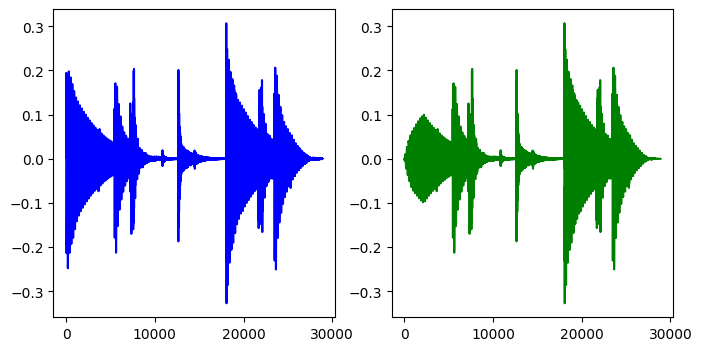

In [75]:
subplot(s, s * f)

We aren't just limited to linear functions! Any *continuous* function works.

In [78]:
f = np.geomspace(0.1, 2, s.shape[0])

IPython.display.Audio(s * f, rate=sr, normalize=False)

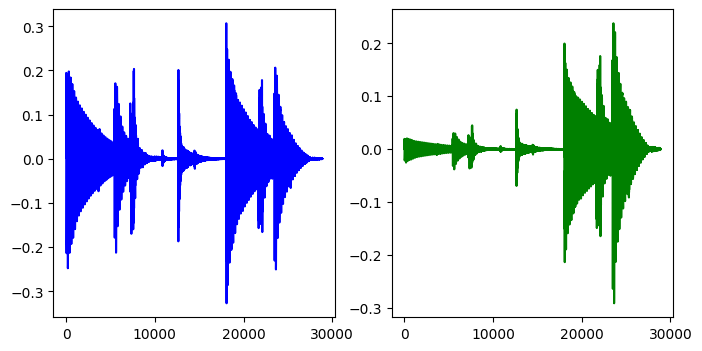

In [79]:
subplot(s, s * f)

Let's return to our made-from-scratch sound...

In [101]:
sample_rate = 8000 # how many samples to play per second
t = lambda duration: np.linspace(0, duration, num=int(sample_rate * duration))

sound = lambda f, t, a: 0.1 * a * np.sin(f * 2 * np.pi * t)

original = sound(440, t(3), 1)

IPython.display.Audio(original, rate=sample_rate, normalize=False)

Notice that, alongside the *amplitude*, we use functions or arrays for *frequency* as well! 

In [93]:
f = np.linspace(0.5, 1.5, t(3).shape[0])

IPython.display.Audio(sound(440*f, t(3), 1), rate=sample_rate, normalize=False)

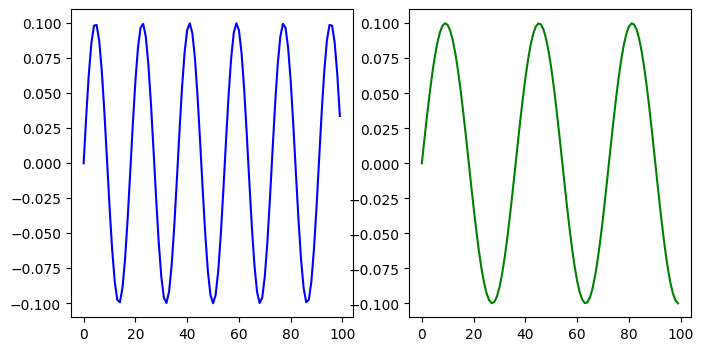

In [97]:
subplot(sound(440, t(3), 1)[0:100], sound(440*f, t(3), 1)[0:100])

In [99]:
f = np.linspace(0.5, 1.5, t(3).shape[0])

a = np.linspace(1, 0.2, t(3).shape[0])

sound_f_a = sound(440*f, t(3), a)

IPython.display.Audio(sound_f_a, rate=sample_rate, normalize=False)

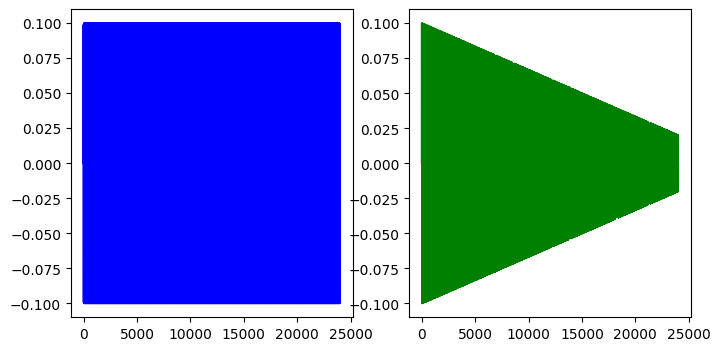

In [104]:
subplot(original, sound_f_a)

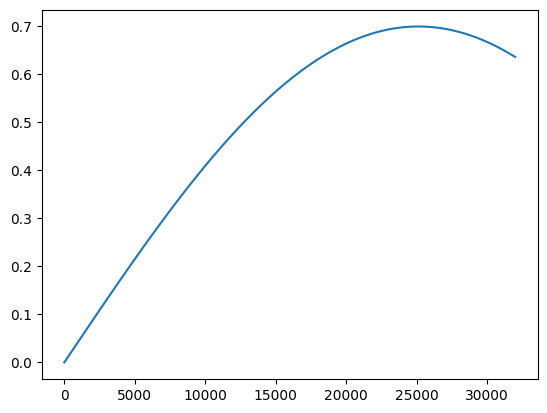

In [144]:
f = 0.7*np.sin(0.5*t(4))
plt.plot(f)
IPython.display.Audio(sound(1000*f, t(4), 0.5), rate=sample_rate, normalize=False)

## Challenge: cross-fading

Suppose we want to fade into our sound from white noise. We want the noise to play for 2 seconds, then fade into our sound for 2 seconds. How would we do that?

In [186]:
# white noise:
f = 0.05*np.random.normal(size=t(10).shape)
IPython.display.Audio(f, rate=sample_rate, normalize=False)

In [185]:
# Our sound
sr, s = wav.read('percussion.wav')
s = (s/np.linalg.norm(s)) * 10
s = np.hstack([s, s, s, s])
IPython.display.Audio(s, rate=sr, normalize=False)

## Addition: More sinusoids

Sinusoids can *greatly* change the timbre of sound, and can be operated on each other to create new sounds entirely. Check out [Waveforms](https://arc.net/l/quote/oqcqtemn) for more details

In [188]:
sample_rate = 8000 # how many samples to play per second
t = lambda duration: np.linspace(0, duration, num=int(sample_rate * duration))

sound = lambda f, t, a, sinusoid=np.sin: 0.1 * a * sinusoid(f * 2 * np.pi * t)

original = sound(440, t(3), 1)

IPython.display.Audio(original, rate=sample_rate, normalize=False)

In [189]:
import scipy
original = sound(440, t(3), 1, scipy.signal.sawtooth)

IPython.display.Audio(original, rate=sample_rate, normalize=False)

In [190]:
original = sound(440, t(3), 1, scipy.signal.square)

IPython.display.Audio(original, rate=sample_rate, normalize=False)

In [198]:
f = scipy.signal.triang(t(3).shape[0])

original = sound(440, t(3), 1)

IPython.display.Audio(original, rate=sample_rate, normalize=False)

/var/folders/1z/vffpnyhj2110bs42k7_mxjsw0000gn/T/ipykernel_49441/1084736940.py:1: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  f = scipy.signal.triang(t(3).shape[0])
